<a href="https://colab.research.google.com/github/ritaprova/66-days-of-data/blob/main/31_12_Day_3_Linear_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

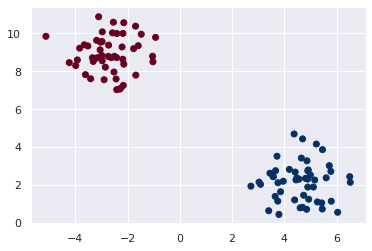

In [12]:
#creating the data
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
X,y = make_blobs(n_samples=100,centers=2,cluster_std=1.0,random_state=42) # creating the clusters
import seaborn as sns 
sns.set()
plt.scatter(X[:,0],X[:,1],c=y,cmap="RdBu")

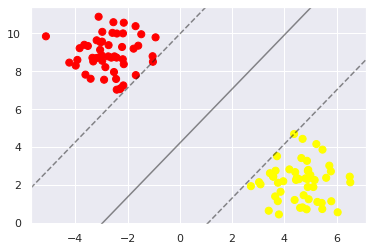

In [28]:
#getting the svc fit 
from sklearn.svm import SVC
clf = SVC(kernel="linear",C=1)
clf.fit(X,y)
#creating a function to plot the dist between the boundaries 
def plot_svc_decision_function(model,ax=None,plot_support=True):
  """plots the decision func for a 2D SVC"""
  if ax is None:
    ax = plt.gca()  #if the apt axis is not there , create one 
  xlim = ax.get_xlim()
  ylim = ax.get_ylim()
  #create grid to evaluate the model
  x = np.linspace(xlim[0], xlim[1], 30)
  y = np.linspace(ylim[0], ylim[1], 30)
  Y, X = np.meshgrid(y, x)
  xy = np.vstack([X.ravel(), Y.ravel()]).T
  P = model.decision_function(xy).reshape(X.shape)
  # plot decision boundary and margins
  ax.contour(X, Y, P, colors='k',
  levels=[-1, 0, 1], alpha=0.5,
  linestyles=['--', '-', '--'])
  # plot support vectors
  if plot_support:
    ax.scatter(model.support_vectors_[:, 0],
    model.support_vectors_[:, 1],
    s=300, linewidth=1, facecolors='none');
  ax.set_xlim(xlim)
  ax.set_ylim(ylim)


plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf);

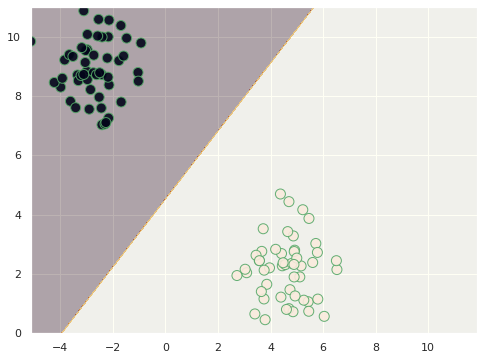

In [32]:
# using the support vector machine from sklearn
from sklearn import svm
C = 0.001
clf = svm.SVC(kernel='linear', C=C)
#clf = svm.LinearSVC(C=C, loss='hinge')
#clf = svm.SVC(kernel='poly', degree=3, C=C)
#clf = svm.SVC(kernel='rbf', gamma=0.7, C=C)
clf.fit(X, y)
Xv = X.reshape(-1,1)
import numpy as np
h = 0.01
#x_min, x_max = Xv.min(), Xv.max() + 1
#y_min, y_max = y.min(), y.max() + 1
x_min = -5.128942727142494
x_max =  11.86656431270726
y_min = 0
y_max = 11
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
fig = plt.figure(figsize=(8,6))
ax = plt.contourf(xx, yy, z, cmap = 'afmhot', alpha=0.3);
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, 
            alpha=0.9, edgecolors='g');

In [31]:
x_min,x_max,y_min,y_max

(-5.128942727142494, 11.86656431270726, 0, 11)